## Calculating bond order parameters

This example illustrates the calculation of bond order parameters. Bond order parameters, represented by $q_l$ and their averaged versions, $\bar{q}_l$ have been used for identifying atoms belong to different crystal structures. In this example, we will consider one MD snapshot each for bcc, fcc, hcp and liquid, and calculate the $q_4$ and $q_6$ parameters and their averaged versions which are widely used in literature.  

In [1]:
import pyscal.core as pc
import numpy as np
import matplotlib.pyplot as plt

We will consider two sets of MD snapshots, first a set of perfect bcc, fcc and hcp configurations and another set with thermal vibrations.

### Perfect structures

#### Read in the input files

First `System` objects are created for each of the different configurations and the input files are read in.

In [32]:
bcc = pc.System()
bcc.read_inputfile('conf0.bcc', format='lammps-dump')
fcc = pc.System()
fcc.read_inputfile('conf0.fcc', format='lammps-dump')
hcp = pc.System()
hcp.read_inputfile('conf0.hcp', format='lammps-dump')

The next major step is calculation of neighbors. There are two ways to calculate neighbors, by using a cutoff distance or by using the voronoi cells. We will try both approaches, but start with the cutoff method.

#### $q_4-q_6$ cutoff neighbor method

In [33]:
bcc.get_neighbors(method='cutoff', cutoff=3.50)
fcc.get_neighbors(method='cutoff', cutoff=3.50)
hcp.get_neighbors(method='cutoff', cutoff=3.50)

We have used a cutoff of 3 here, but this is a parameter that has to be tuned. Using a different cutoff for each structure is possible, but it would complicate the method if the system has a mix of structures. Now we can calculate the $q_4$ and $q_6$ distributions 

In [34]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])

Thats it! Now lets gather the results and plot them.

In [35]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])

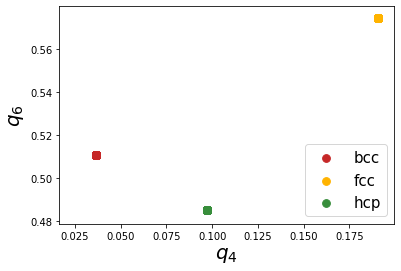

In [36]:
plt.scatter(bccq[0], bccq[1], s=60, label='bcc', color='#C62828')
plt.scatter(fccq[0], fccq[1], s=60, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=60, label='hcp', color='#388E3C')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

Firstly, we can see that all the atoms fall on one specific point which is due to the absence of thermal vibrations. Next, all the points are well separated and show good distinction. However, in most cases the atomic positions are affected by thermal vibrations and hence show a spread in the distribution. We will take a look at this in the next case.. 

### Structures with thermal vibrations

Lets start with reading in the MD configurations

In [37]:
bcc = pc.System()
bcc.read_inputfile('conf.bcc', format='lammps-dump')
fcc = pc.System()
fcc.read_inputfile('conf.fcc', format='lammps-dump')
hcp = pc.System()
hcp.read_inputfile('conf.hcp', format='lammps-dump')
lqd = pc.System()
lqd.read_inputfile('conf.lqd', format='lammps-dump')

Similar to the last example, we use the cutoff method

#### cutoff method

In [38]:
bcc.get_neighbors(method='cutoff', cutoff=3.50)
fcc.get_neighbors(method='cutoff', cutoff=3.50)
hcp.get_neighbors(method='cutoff', cutoff=3.50)
lqd.get_neighbors(method='cutoff', cutoff=3.50)

And now, calculate q parameters

In [39]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])
lqd.calculate_q([4,6])

Gather the q vales and plot them

In [40]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])
lqdq = lqd.get_qvals([4, 6])

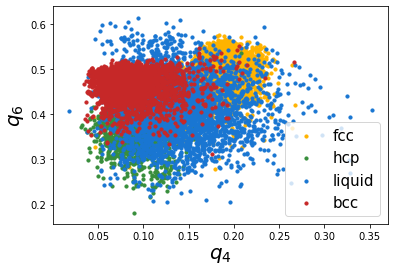

In [41]:
plt.scatter(fccq[0], fccq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(lqdq[0], lqdq[1], s=10, label='liquid', color='#1976D2')
plt.scatter(bccq[0], bccq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This is not so great as the first case, we can see that the thermal vibrations cause the distributions to spread a lot and overlap with each other. Lechner and Dellago proposed using the averaged distributions, $\bar{q}_4-\bar{q}-6$ to better distinguish the distributions. Lets try that. 

In [42]:
bcc.calculate_q([4,6], averaged=True)
fcc.calculate_q([4,6], averaged=True)
hcp.calculate_q([4,6], averaged=True)
lqd.calculate_q([4,6], averaged=True)

In [43]:
bccaq = bcc.get_qvals([4, 6], averaged=True)
fccaq = fcc.get_qvals([4, 6], averaged=True)
hcpaq = hcp.get_qvals([4, 6], averaged=True)
lqdaq = lqd.get_qvals([4, 6], averaged=True)

Lets see if these distributions are better..

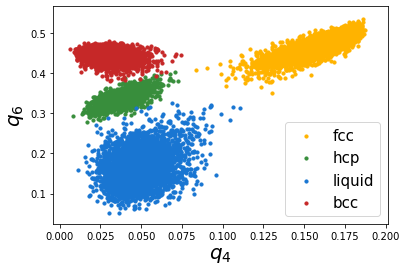

In [44]:
plt.scatter(fccaq[0], fccaq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpaq[0], hcpaq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(lqdaq[0], lqdaq[1], s=10, label='liquid', color='#1976D2')
plt.scatter(bccaq[0], bccaq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This looks much better! We can see that the resolution is much better than the non averaged versions.

### Voronoi method for neighbors

Finally, we will try the Voronoi method to identify neighbors. This method has the advantage that it is parameter-free. Lets see how it does. We can use the existing systems we created, but recalculate the neighbors.

In [45]:
bcc.get_neighbors(method='voronoi')
fcc.get_neighbors(method='voronoi')
hcp.get_neighbors(method='voronoi')
lqd.get_neighbors(method='voronoi')

We calculate q params and plot the values

In [46]:
bcc.calculate_q([4,6], averaged=True)
fcc.calculate_q([4,6], averaged=True)
hcp.calculate_q([4,6], averaged=True)
lqd.calculate_q([4,6], averaged=True)

In [47]:
bccaq = bcc.get_qvals([4, 6], averaged=True)
fccaq = fcc.get_qvals([4, 6], averaged=True)
hcpaq = hcp.get_qvals([4, 6], averaged=True)
lqdaq = lqd.get_qvals([4, 6], averaged=True)

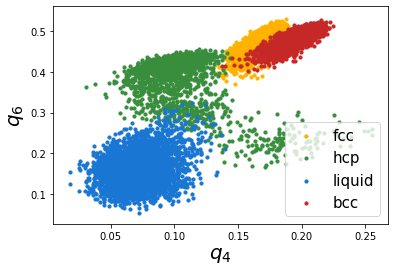

In [48]:
plt.scatter(fccaq[0], fccaq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpaq[0], hcpaq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(lqdaq[0], lqdaq[1], s=10, label='liquid', color='#1976D2')
plt.scatter(bccaq[0], bccaq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This method also distinguishes the structures well, except for some overlap between fcc and bcc regions. However, there is the distinct advantage that its parameter free.